In [2]:
import matplotlib as mpl
import matplotlib.style
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import hist
mpl.style.use('default')
from scipy import stats
from scipy.stats import ks_2samp

File contains galaxy data read in UV, IR, and optical wavelengths

In [3]:
UV_ = fits.open('UV_match_WISE_Pipe3d_MangaHI.fits')
UV = UV_[1].data

In [4]:
good = np.where(UV["logMHI"] > 9.3)
'''
threshold for HI-rich is 9.3 magnitudes
threshold for low SFR is -10.4 magnitudes
threshold for low SFR in IR color is 2 mag
'''



yHa=UV['log_SFR_Ha'][good]-UV['log_mass'][good]
ySF=UV['log_SFR_SF'][good]-UV['log_mass'][good]
yDC=UV['log_SFR_D_C'][good]-UV['log_mass'][good]
yssp100=UV['log_SFR_ssp_100Myr'][good]-UV['log_mass'][good]
yssp10=UV['log_SFR_ssp_10Myr'][good]-UV['log_mass'][good]
yssp32=UV['log_SFR_ssp'][good]-UV['log_mass'][good]

sSFRHa to sSFR derived from different sources:

Quadrant 2 (input sSFR star forming but SF not star forming):
SSP10: 418 or 18.70246085011186 %
SSP32: 320 or 14.317673378076062 %
SSP100: 116 or 5.190156599552573 %

The last two (SF-only and DC) are expected because they are all corrections of the original SFR(Ha), so their expected SFRs can only go lower. Essentially, SF-only and DC can never be star forming while SFR(Ha) is not.

Quadrant 4 (input sSFR not star forming but SF star forming):
SSP10: 16 or 0.7158836689038032 %
SSP32: 69 or 3.087248322147651 %
SSP100: 509 or 22.774049217002236 %


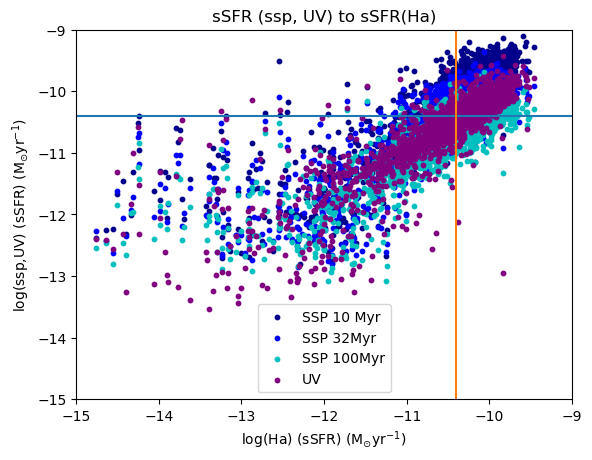

In [20]:
x=UV['log_SFR_Ha'][good]-UV['log_mass'][good]

#plt.scatter (x, ySF, s=10, color = 'red', label = "SF Only")
#plt.scatter (x, yDC, s=10, color = 'maroon', label = "Diffuse correct")
plt.scatter (x, yssp10, s=10, color = 'darkblue', label = "SSP 10 Myr")
plt.scatter (x, yssp32, s=10, color = 'blue', label = "SSP 32Myr")
plt.scatter (x, yssp100, s=10, color = 'c', label = "SSP 100Myr")
plt.scatter (x, yUV, s=10, color='purple', label='UV')

plt.title ('sSFR (ssp, UV) to sSFR(Ha)')
plt.xlabel ('log(Ha) (sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.ylabel ('log(ssp,UV) (sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.legend ()
plt.plot([-16,-9], [-10.4,-10.4])
plt.plot ([-10.4,-10.4], (-18, -8))
plt.xlim(-15,-9)
plt.ylim(-15,-9)

print('Quadrant 2 (input sSFR star forming but SF not star forming):' 
          '\n' 'SSP10:', len(yssp10[(x<=-10.4)&(yssp10>-10.4)]), "or", (len(yssp10[(x<=-10.4)&(yssp10>-10.4)])/len(yssp10))*100,"%"
          '\n' 'SSP32:', len(yssp32[(x<=-10.4)&(yssp32>-10.4)]), "or", (len(yssp32[(x<=-10.4)&(yssp32>-10.4)])/len(yssp32))*100,"%"
          '\n' 'SSP100:', len(yssp100[(x<=-10.4)&(yssp100>-10.4)]),"or", (len(yssp100[(x<=-10.4)&(yssp100>-10.4)])/len(yssp100))*100,"%"
         # '\n' 'SF-only:', len(ySF[(x<=-10.4)&(ySF>-10.4)]),"or", (len(ySF[(x<=-10.4)&(ySF>-10.4)])/len(ySF))*100,"%"
         # '\n' 'Diffuse corrected:', len(yDC[(x<=-10.4)&(yDC>-10.4)]), "or", len(yDC[(x<=-10.4)&(yDC>-10.4)])*100,"%"
     )
print('\n''The last two (SF-only and DC) are expected because they are all corrections of the original SFR(Ha), so their expected SFRs can only go lower. Essentially, SF-only and DC can never be star forming while SFR(Ha) is not.')


print ('\n''Quadrant 4 (input sSFR not star forming but SF star forming):'
          '\n' 'SSP10:', len(yssp10[(x>=-10.4)&(yssp10<=-10.4)]), 'or', (len(yssp10[(x>=-10.4)&(yssp10<=-10.4)])/len(yssp10))*100,"%"
          '\n' 'SSP32:', len(yssp32[(x>=-10.4)&(yssp32<=-10.4)]), 'or', (len(yssp32[(x>=-10.4)&(yssp32<=-10.4)])/len(yssp32))*100,"%"
          '\n' 'SSP100:', len(yssp100[(x>=-10.4)&(yssp100<=-10.4)]), 'or', (len(yssp100[(x>=-10.4)&(yssp100<=-10.4)])/len(yssp100))*100,"%"
         # '\n' 'SF-only:', len(ySF[(x>=-10.4)&(ySF<=-10.4)]), 'or', (len(ySF[(x>=-10.4)&(ySF<=-10.4)])/len(ySF))*100,"%"
         # '\n' 'Diffuse corrected:', len(yDC[(x>=-10.4)&(yDC<=-10.4)]), 'or', (len(yDC[(x>=-10.4)&(yDC<=-10.4)])/len(yDC))*100,"%"
      )

SSP 32Myr sSFR to sSFR derived from different sources:

Quadrant 2 (input sSFR star forming but ssp32Myr not star forming):
SSP10: 176 or 7.874720357941835 %
SSP100: 0 or 0.0 %
Ha: 69 or 3.087248322147651 %

Quadrant 4 (input sSFR not star forming but ssp32Myr star forming):
SSP10: 24 or 1.0738255033557047 %
SSP100: 644 or 28.814317673378078 %
Ha: 320 or 14.317673378076062 %


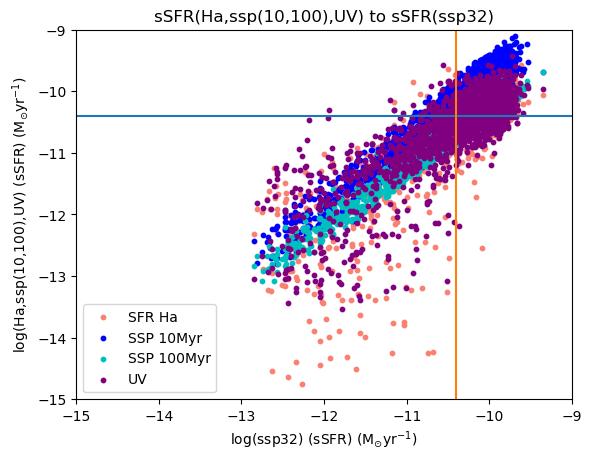

In [21]:
x= UV['log_SFR_ssp'][good]-UV['log_mass'][good]

plt.scatter (x, yHa, s=10, color = "salmon", label = "SFR Ha")
#plt.scatter (x, ySF, s=10, color = "red", label ="SF Only")
#plt.scatter (x, yDC, s=10, color = "maroon", label ="Diffuse corrected")
plt.scatter (x, yssp10, s=10, color="blue", label= "SSP 10Myr")
plt.scatter (x, yssp100, s=10, color = "c", label ="SSP 100Myr")
plt.scatter (x, yUV, s=10, color='purple', label='UV')

plt.title ('sSFR(Ha,ssp(10,100),UV) to sSFR(ssp32)')
plt.legend()
plt.xlabel ('log(ssp32) (sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.ylabel ('log(Ha,ssp(10,100),UV) (sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.xlim (-15,-9)
plt.ylim (-15,-9)
plt.plot ((-15,-9),(-10.4, -10.4))
plt.plot ((-10.4, -10.4), (-15,-9))

print('Quadrant 2 (input sSFR star forming but ssp32Myr not star forming):' 
          '\n' 'SSP10:', len(yssp10[(x<=-10.4)&(yssp10>-10.4)]), "or", (len(yssp10[(x<=-10.4)&(yssp10>-10.4)])/len(yssp10))*100,"%"
          '\n' 'SSP100:', len(yssp100[(x<=-10.4)&(yssp100>-10.4)]),"or", (len(yssp100[(x<=-10.4)&(yssp100>-10.4)])/len(yssp100))*100,"%"
         # '\n' 'SF-only:', len(ySF[(x<=-10.4)&(ySF>-10.4)]),"or", (len(ySF[(x<=-10.4)&(ySF>-10.4)])/len(ySF))*100,"%"
         # '\n' 'Diffuse corrected:', len(yDC[(x<=-10.4)&(yDC>-10.4)]), "or", len(yDC[(x<=-10.4)&(yDC>-10.4)])*100,"%"
          '\n' 'Ha:', len(yHa[(x<=-10.4)&(yHa>-10.4)]), "or", (len(yHa[(x<=-10.4)&(yHa>-10.4)])/len(yHa))*100, '%'
     )

print ('\n' 'Quadrant 4 (input sSFR not star forming but ssp32Myr star forming):'
          '\n' 'SSP10:', len(yssp10[(x>=-10.4)&(yssp10<-10.4)]), 'or', (len(yssp10[(x>=-10.4)&(yssp10<=-10.4)])/len(yssp10))*100,"%"
          '\n' 'SSP100:', len(yssp100[(x>=-10.4)&(yssp100<-10.4)]), 'or', (len(yssp100[(x>=-10.4)&(yssp100<=-10.4)])/len(yssp100))*100,"%"
         # '\n' 'SF-only:', len(ySF[(x>=-10.4)&(ySF<-10.4)]), 'or', (len(ySF[(x>=-10.4)&(ySF<=-10.4)])/len(ySF))*100,"%"
         # '\n' 'Diffuse corrected:', len(yDC[(x>-10.4)&(yDC<=-10.4)]), 'or', (len(yDC[(x>=-10.4)&(yDC<=-10.4)])/len(yDC))*100,"%"
          '\n' 'Ha:', len(yHa[(x>=-10.4)&(yHa<-10.4)]), 'or', (len(yHa[(x>=-10.4)&(yHa<=-10.4)])/len(yHa))*100,"%"
      )

IR sSFR to optical sSFR (using W2-W3 color that *corresponds* to sSFR, hence the 2 instead of -10.4 being the dictator of low SFR

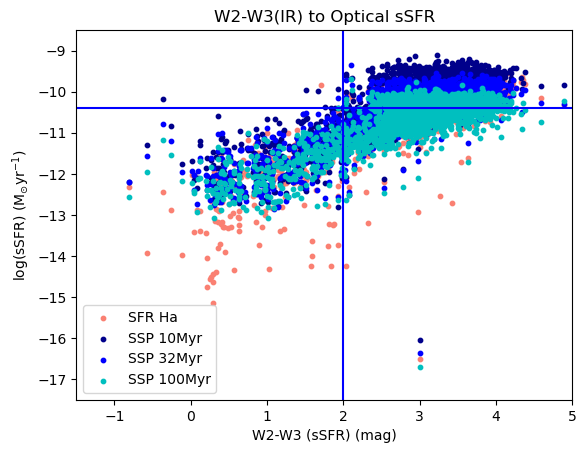

In [7]:
W2 = UV['W2_mag'][good]
W3 = UV['W3_mag'][good]
x2= W2-W3

plt.scatter (x2, yHa, color = "salmon", s=10, label = "SFR Ha")
#plt.scatter (x2, ySF, color = "red", s= 30, label ="SF Only")
#plt.scatter (x2, yDC, color = "maroon", s= 20, label ="Diffuse corrected")
plt.scatter (x2, yssp10, color = 'darkblue', s=10, label ="SSP 10Myr")
plt.scatter (x2, yssp32, color= 'blue', s=10, label= "SSP 32Myr")
plt.scatter (x2, yssp100, color= 'c', s=10, label= "SSP 100Myr")

plt.title ('W2-W3(IR) to Optical sSFR')
plt.xlabel ('W2-W3 (sSFR) (mag)')
plt.ylabel ('log(sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.legend()
plt.xlim (-1.5,5)
plt.ylim (-17.5,-8.5)

plt.plot ((2,2),(-20,-8), color = "b")
plt.plot ((-3,5),(-10.4,-10.4), color= "b")

Still W2-W3 to optical sSFR, split between Ha and SSP, since SF and DC are corrected forms of Ha, and SSPs are all corrected forms of one of them (still unsure of which one)

Non star-forming according to W2-W3 (SF in Ha): 2
Star-forming according to W2-W3(not SF in Ha): 680 
Only counting Ha because SF and DC are corrections, only need Ha to count this

Non star-forming according to W2-W3(SF in ssp): 7
Star-forming according to W2-W3(not SF in ssp): 327


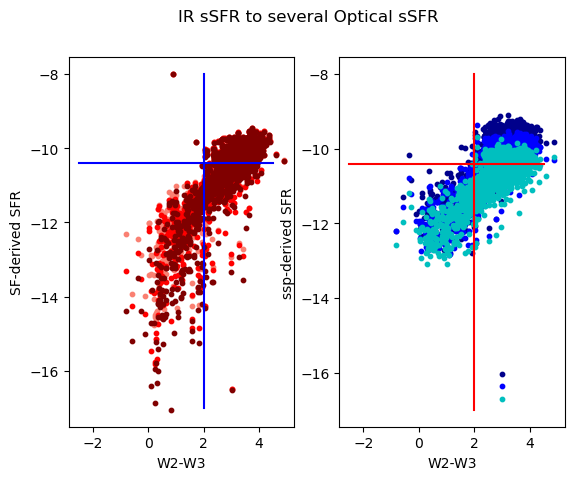

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('IR sSFR to several Optical sSFR')

ax1.scatter(x2, yHa, color='salmon', s=10)
ax1.scatter(x2, ySF, color='red', s=10)
ax1.scatter(x2, yDC, color='maroon', s=10)

ax2.scatter(x2, yssp10, color='darkblue', s=10)
ax2.scatter(x2, yssp32, color='blue', s=10)
ax2.scatter(x2, yssp100, color='c', s=10)


ax1.plot((-2.5,4.5),(-10.4,-10.4), color = "b")
ax1.plot((2,2),(-17,-8), color='b')
ax2.plot((-2.5,4.5),(-10.4,-10.4), color = "r")
ax2.plot((2,2),(-17,-8), color='r')

ax1.set_xlabel ('W2-W3')
ax1.set_ylabel ('SF-derived SFR')
ax2.set_xlabel ('W2-W3')
ax2.set_ylabel ('ssp-derived SFR')

print('Non star-forming according to W2-W3 (SF in Ha):', len(yHa[(x2<2)&(yHa>-10.4)])) 
print('Star-forming according to W2-W3(not SF in Ha):', len(yHa[(x2>=2)&(yHa<-10.4)]),
'\n' 'Only counting Ha because SF and DC are corrections, only need Ha to count this')


print('\n' 'Non star-forming according to W2-W3(SF in ssp):', len(yssp10[(x2<2)&(yssp10>-10.4)]))
print('Star-forming according to W2-W3(not SF in ssp):', len(yssp10[(x2>=2)&(yssp10<-10.4)]))


W2-W3 to all optical and UV sSFR

(-17.5, -7.5)

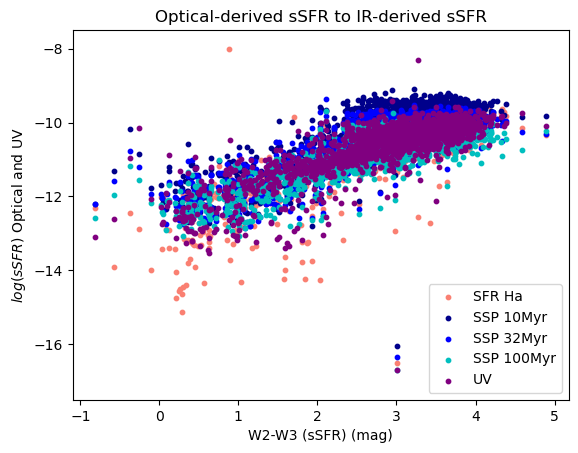

In [9]:
yUV = (UV['logSFR'][good]-UV['log_mass'][good])
#logSFR corresponds to UV SFR in data file

plt.scatter (x2, yHa, color = "salmon", s=10, label = "SFR Ha")
#plt.scatter (x2, ySF, color = "red", s= 30, label ="SF Only")
#plt.scatter (x2, yDC, color = "maroon", s= 20, label ="Diffuse corrected")
plt.scatter (x2, yssp10, color = 'darkblue', s=10, label ="SSP 10Myr")
plt.scatter (x2, yssp32, color= 'blue', s=10, label= "SSP 32Myr")
plt.scatter (x2, yssp100, color= 'c', s=10, label= "SSP 100Myr")
plt.scatter (x2, yUV, color= 'purple', s=10, label= "UV")

plt.legend()
plt.title ('Optical-derived sSFR to IR-derived sSFR')
plt.xlabel ('W2-W3 (sSFR) (mag)')
plt.ylabel ('$log(sSFR)$ Optical and UV')
plt.ylim (-17.5,-7.5)

Stellar mass of galaxies which are HI rich and low star forming. Separated into how low SFR was determined.

(9.0, 12.0)

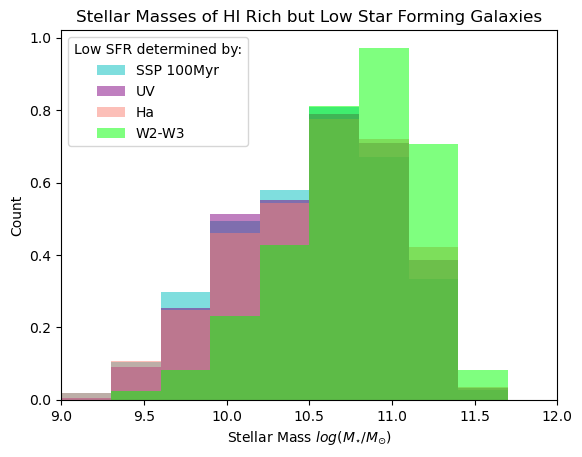

In [10]:
## plotting stellar mass only for low star forming galaxies
UVgood = UV[good]
plt.hist (UVgood['log_mass'][np.where(yssp100<-10.4)], range=(9,12), bins=10, alpha=0.5, color='c', label='SSP 100Myr', density=True)
plt.hist (UVgood['log_mass'][np.where(yUV<-10.4)], range=(9,12),bins=10, alpha=0.5, color='purple', label='UV', density=True)
plt.hist (UVgood['log_mass'][np.where(yHa<-10.4)], range=(9,12),bins=10, alpha=0.5, color='salmon', label='Ha', density=True)
#plt.hist (UVgood['log_mass'][np.where(yssp32<-10.4)], range=(9,12),bins=10, alpha=0.7, color='blue', label='SSP 32Myr')
#plt.hist (UVgood['log_mass'][np.where(yssp10<-10.4)], range=(9,12),bins=10, alpha=0.7, color='darkblue', label='SSP 10Myr')
plt.hist (UVgood['log_mass'][np.where(x2<2)],range=(9,12), bins=10, alpha=0.5, color='lime', label='W2-W3', density=True)

legend = plt.legend()
legend.set_title('Low SFR determined by:')
plt.title ('Stellar Masses of HI Rich but Low Star Forming Galaxies')
plt.xlabel ('Stellar Mass $log(M_{\star}/M_{\odot})$')
plt.ylabel ('Count')
plt.xlim(9,12)

KstestResult(statistic=0.11140873015873017, pvalue=0.013473004960000479)

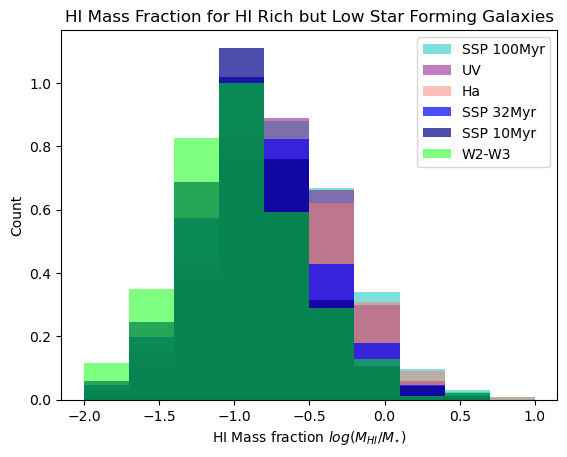

In [26]:
xmin=-2
xmax=1

plt.hist (-UVgood['log_mass'][np.where(yssp100<-10.4)]+UVgood['logMHI'][np.where(yssp100<-10.4)], range=(xmin,xmax), bins=10, alpha=0.5, color='c', label='SSP 100Myr', density=True)
plt.hist (-UVgood['log_mass'][np.where(yUV<-10.4)]+UVgood['logMHI'][np.where(yUV<-10.4)], range=(xmin,xmax),bins=10, alpha=0.5, color='purple', label='UV', density=True)
plt.hist (-UVgood['log_mass'][np.where(yHa<-10.4)]+UVgood['logMHI'][np.where(yHa<-10.4)], range=(xmin,xmax),bins=10, alpha=0.5, color='salmon', label='Ha', density=True)
plt.hist (-UVgood['log_mass'][np.where(yssp32<-10.4)]+UVgood['logMHI'][np.where(yssp32<-10.4)], range=(xmin,xmax),bins=10, alpha=0.7, color='blue', label='SSP 32Myr', density=True)
plt.hist (-UVgood['log_mass'][np.where(yssp10<-10.4)]+UVgood['logMHI'][np.where(yssp10<-10.4)], range=(xmin,xmax),bins=10, alpha=0.7, color='darkblue', label='SSP 10Myr', density=True)
plt.hist (-UVgood['log_mass'][np.where(x2<2)]+UVgood['logMHI'][np.where(x2<2)],range=(xmin,xmax), bins=10, alpha=0.5, color='lime', label='W2-W3', density=True)

plt.title ('HI Mass Fraction for HI Rich but Low Star Forming Galaxies')
plt.xlabel ('HI Mass fraction $log(M_{HI}/M_{\star})$')
plt.ylabel ('Count')
legend = plt.legend()

IRHImassfrac=UVgood['logMHI'][IRLowSF]-UVgood['log_mass'][IRLowSF]

stats.kstest(IRHImassfrac, (UVgood['logMHI'][ssp10LowSF]-UVgood['log_mass'][ssp10LowSF]))

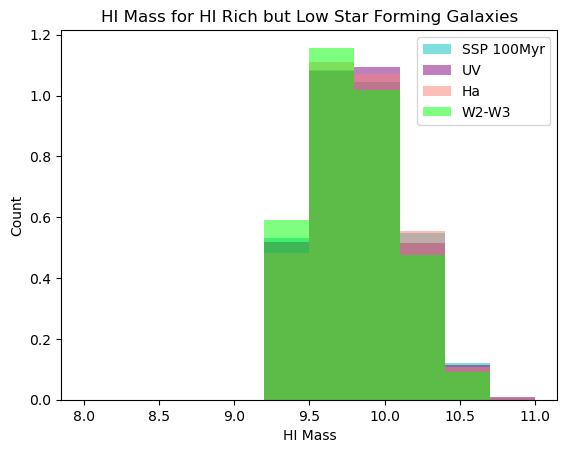

In [12]:
plt.hist (UVgood['logMHI'][np.where(yssp100<-10.4)], range=(8,11), bins=10, alpha=0.5, color='c', label='SSP 100Myr', density=True)
plt.hist (UVgood['logMHI'][np.where(yUV<-10.4)], range=(8,11),bins=10, alpha=0.5, color='purple', label='UV', density=True)
plt.hist (UVgood['logMHI'][np.where(yHa<-10.4)], range=(8,11),bins=10, alpha=0.5, color='salmon', label='Ha', density=True)
#plt.hist (UVgood['logMHI'][np.where(yssp32<-10.4)], range=(8,11),bins=10, alpha=0.7, color='blue', label='SSP 32Myr')
#plt.hist (UVgood['logMHI'][np.where(yssp10<-10.4)], range=(8,11),bins=10, alpha=0.7, color='darkblue', label='SSP 10Myr')
plt.hist (UVgood['logMHI'][np.where(x2<2)],range=(8,11), bins=10, alpha=0.5, color='lime', label='W2-W3', density=True)

plt.title ('HI Mass for HI Rich but Low Star Forming Galaxies')
plt.xlabel ('HI Mass')
plt.ylabel ('Count')
plt.legend()


In [13]:
check=UVgood['WP20']
len(check[np.where(check>0)])

2234

Text(0, 0.5, 'Count')

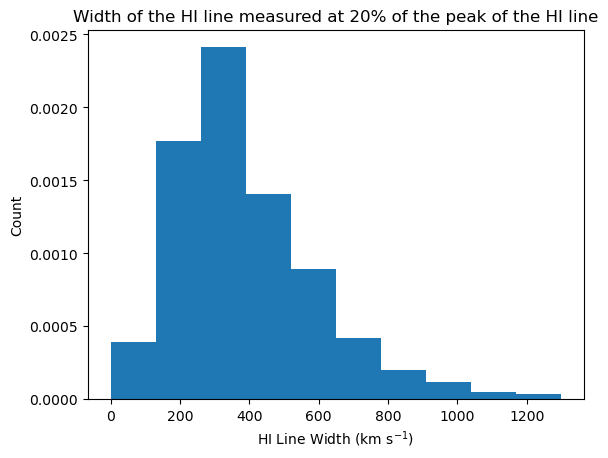

In [14]:
plt.hist (UVgood['WP20']/UVgood['sini'], range=[0,1300] , bins=10, density=True)
#accounted for inclination

plt.title ('Width of the HI line measured at 20% of the peak of the HI line')
plt.xlabel ('HI Line Width (km s$^{-1}$)')
plt.ylabel ('Count')


Text(0, 0.5, 'Count')

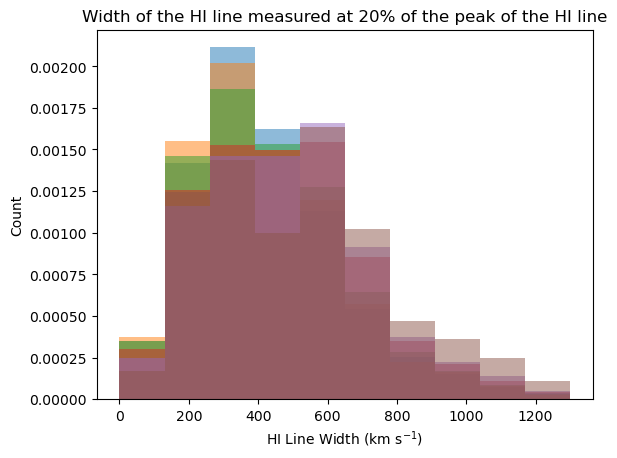

In [25]:
ssp100LowSF = np.where(yssp100<-10.4)
plt.hist (UVgood['WP20'][ssp100LowSF]/UVgood['sini'][ssp100LowSF], range=[0,1300] , bins=10, density=True, alpha=0.5)

UVLowSF = np.where(yUV<-10.4)
plt.hist (UVgood['WP20'][UVLowSF]/UVgood['sini'][UVLowSF], range=[0,1300] , bins=10, density=True, alpha=0.5)

HaLowSF = np.where(yHa<-10.4)
plt.hist (UVgood['WP20'][HaLowSF]/UVgood['sini'][HaLowSF], range=[0,1300] , bins=10, density=True, alpha=0.5)

ssp32LowSF = np.where(yssp32<-10.4)
plt.hist (UVgood['WP20'][ssp32LowSF]/UVgood['sini'][ssp32LowSF], range=[0,1300] , bins=10, density=True, alpha=0.5)

ssp10LowSF = np.where(yssp10<-10.4)
plt.hist (UVgood['WP20'][ssp10LowSF]/UVgood['sini'][ssp10LowSF], range=[0,1300] , bins=10, density=True, alpha=0.5)


IRLowSF = np.where(x2<2)
plt.hist (UVgood['WP20'][IRLowSF]/UVgood['sini'][IRLowSF], range=[0,1300] , bins=10, density=True, alpha=0.5)


plt.title ('Width of the HI line measured at 20% of the peak of the HI line')
plt.xlabel ('HI Line Width (km s$^{-1}$)')
plt.ylabel ('Count')

Graphical analysis shows discrepancies. Next perform K-S tests for the following parameters in the histograms, with a significant difference threshold of p<0.05.

In [16]:
DAP_ = fits.open('DAP_match_IV_Optical_IR.fits')
DAP = DAP_[1].data

K-S test for HA Rotation Velocity
For Ha:  KstestResult(statistic=0.02672497570456754, pvalue=0.9955603917233052)
For ssp10:  KstestResult(statistic=0.024503968253968254, pvalue=0.999540756886477)
For ssp32:  KstestResult(statistic=0.028674694515487355, pvalue=0.9927416943834126)
For ssp100:  KstestResult(statistic=0.032024310425432446, pvalue=0.9588534320965966)
For UV:  KstestResult(statistic=0.031215103294249022, pvalue=0.9712678853772694)


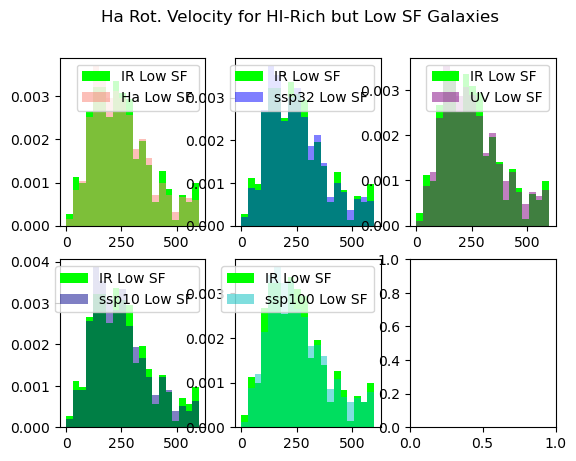

In [44]:
HaRotV=DAP['HA_GVEL_HI_CLIP']-DAP['HA_GVEL_LO_CLIP']
a=0.5
xx=0
yy=600
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Ha Rot. Velocity for HI-Rich but Low SF Galaxies')


axs[0,0].hist(HaRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,0].hist(HaRotV[HaLowSF], bins=20, alpha=a, range=(xx,yy), color='salmon', label=('Ha Low SF'), density=True)
axs[0,0].legend()

axs[1,0].hist(HaRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,0].hist(HaRotV[ssp10LowSF], bins=20, alpha=a, range=(xx,yy), color = 'darkblue', label=('ssp10 Low SF'), density=True)
axs[1,0].legend()


axs[0,1].hist(HaRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,1].hist(HaRotV[ssp32LowSF], bins=20, alpha=a, range=(xx,yy), color='blue', label=('ssp32 Low SF'), density=True)
axs[0,1].legend()

axs[1,1].hist(HaRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,1].hist(HaRotV[ssp100LowSF], bins=20, alpha=a, range=(xx,yy), color= 'c', label=('ssp100 Low SF'), density=True)
axs[1,1].legend()

axs[0,2].hist(HaRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,2].hist(HaRotV[UVLowSF], bins=20, alpha=a, color= 'purple', range=(xx,yy), label=('UV Low SF'), density=True)
axs[0,2].legend()

'''
K-S tests
'''
print ('K-S test for HA Rotation Velocity')
print ('For Ha: ',stats.kstest(HaRotV[IRLowSF], HaRotV[HaLowSF]))
print('For ssp10: ', stats.kstest(HaRotV[IRLowSF], HaRotV[ssp10LowSF]))
print('For ssp32: ', stats.kstest(HaRotV[IRLowSF], HaRotV[ssp32LowSF]))
print('For ssp100: ', stats.kstest(HaRotV[IRLowSF], HaRotV[ssp100LowSF]))
print ('For UV: ', stats.kstest(HaRotV[IRLowSF], HaRotV[UVLowSF]))

K-S test for HA Velocity Dispersion
For Ha:  KstestResult(statistic=0.04634353741496599, pvalue=0.6978763878803197)
For ssp10:  KstestResult(statistic=0.03591269841269841, pvalue=0.9508576153280707)
For ssp32:  KstestResult(statistic=0.03284846547314578, pvalue=0.96995486404837)
For ssp100:  KstestResult(statistic=0.05157199625993455, pvalue=0.5272389277698859)
For UV:  KstestResult(statistic=0.03967755443886097, pvalue=0.841441219358733)


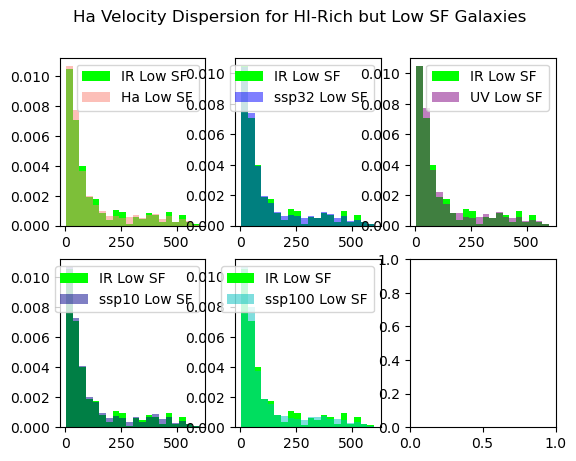

In [35]:
HaVDis=DAP['HA_GSIGMA_1RE']
a=0.5
xx=5
yy=600
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Ha Velocity Dispersion for HI-Rich but Low SF Galaxies')


axs[0,0].hist(HaVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,0].hist(HaVDis[HaLowSF], bins=20, alpha=a, range=(xx,yy), color='salmon', label=('Ha Low SF'), density=True)
axs[0,0].legend()

axs[1,0].hist(HaVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,0].hist(HaVDis[ssp10LowSF], bins=20, alpha=a, range=(xx,yy), color = 'darkblue', label=('ssp10 Low SF'), density=True)
axs[1,0].legend()


axs[0,1].hist(HaVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,1].hist(HaVDis[ssp32LowSF], bins=20, alpha=a, range=(xx,yy), color='blue', label=('ssp32 Low SF'), density=True)
axs[0,1].legend()

axs[1,1].hist(HaVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,1].hist(HaVDis[ssp100LowSF], bins=20, alpha=a, range=(xx,yy), color= 'c', label=('ssp100 Low SF'), density=True)
axs[1,1].legend()

axs[0,2].hist(HaVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,2].hist(HaVDis[UVLowSF], bins=20, alpha=a, color= 'purple', range=(xx,yy), label=('UV Low SF'), density=True)
axs[0,2].legend()


'''
K-S tests
'''
xIR=HaVDis[IRLowSF]
print ('K-S test for HA Velocity Dispersion')
print ('For Ha: ',stats.kstest(xIR, HaVDis[HaLowSF]))
print('For ssp10: ', stats.kstest(xIR, HaVDis[ssp10LowSF]))
print('For ssp32: ', stats.kstest(xIR, HaVDis[ssp32LowSF]))
print('For ssp100: ', stats.kstest(xIR, HaVDis[ssp100LowSF]))
print ('For UV: ', stats.kstest(xIR, HaVDis[UVLowSF]))

K-S test for HA Velocity Asymmetry
For Ha:  KstestResult(statistic=0.045553935860058306, pvalue=0.7177281673967648)
For ssp10:  KstestResult(statistic=0.04117063492063492, pvalue=0.8740708743001641)
For ssp32:  KstestResult(statistic=0.05174587951122478, pvalue=0.603288282603829)
For ssp100:  KstestResult(statistic=0.06180360760479975, pvalue=0.30480683650042717)
For UV:  KstestResult(statistic=0.053269821328866554, pvalue=0.5058268817453317)


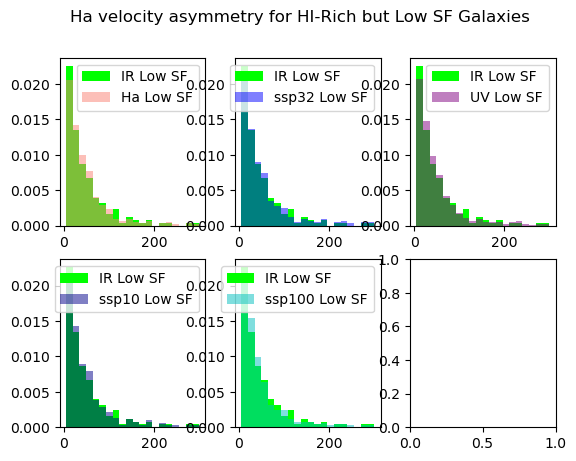

In [37]:
HaVAsym=np.abs(DAP['HA_GVEL_HI_CLIP'])-np.abs(DAP['HA_GVEL_LO_CLIP'])
a=0.5
xx=5
yy=300
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Ha velocity asymmetry for HI-Rich but Low SF Galaxies')


axs[0,0].hist(HaVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,0].hist(HaVAsym[HaLowSF], bins=20, alpha=a, range=(xx,yy), color='salmon', label=('Ha Low SF'), density=True)
axs[0,0].legend()

axs[1,0].hist(HaVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,0].hist(HaVAsym[ssp10LowSF], bins=20, alpha=a, range=(xx,yy), color = 'darkblue', label=('ssp10 Low SF'), density=True)
axs[1,0].legend()


axs[0,1].hist(HaVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,1].hist(HaVAsym[ssp32LowSF], bins=20, alpha=a, range=(xx,yy), color='blue', label=('ssp32 Low SF'), density=True)
axs[0,1].legend()

axs[1,1].hist(HaVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,1].hist(HaVAsym[ssp100LowSF], bins=20, alpha=a, range=(xx,yy), color= 'c', label=('ssp100 Low SF'), density=True)
axs[1,1].legend()

axs[0,2].hist(HaVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,2].hist(HaVAsym[UVLowSF], bins=20, alpha=a, color= 'purple', range=(xx,yy), label=('UV Low SF'), density=True)
axs[0,2].legend()

'''
K-S tests
'''
xIR=HaVAsym[IRLowSF]
print ('K-S test for HA Velocity Asymmetry')
print ('For Ha: ',stats.kstest(xIR, HaVAsym[HaLowSF]))
print('For ssp10: ', stats.kstest(xIR, HaVAsym[ssp10LowSF]))
print('For ssp32: ', stats.kstest(xIR, HaVAsym[ssp32LowSF]))
print('For ssp100: ', stats.kstest(xIR, HaVAsym[ssp100LowSF]))
print ('For UV: ', stats.kstest(xIR, HaVAsym[UVLowSF]))

K-S test for Stellar Rotation Velocity
For Ha:  KstestResult(statistic=0.03486394557823129, pvalue=0.9365283209353876)
For ssp10:  KstestResult(statistic=0.01994047619047619, pvalue=0.9999948048611995)
For ssp32:  KstestResult(statistic=0.024039144643364593, pvalue=0.9994353965354851)
For ssp100:  KstestResult(statistic=0.028537478572541686, pvalue=0.986239338308065)
For UV:  KstestResult(statistic=0.03550739810161921, pvalue=0.9196339674912611)


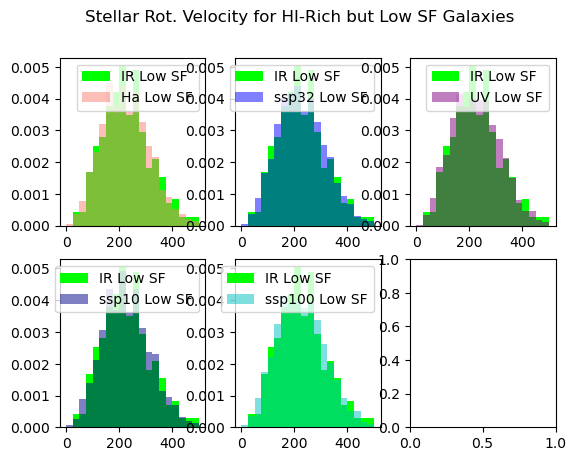

In [38]:
StellarRotV=DAP['STELLAR_VEL_HI_CLIP']-DAP['STELLAR_VEL_LO_CLIP']
a=0.5
xx=0
yy=500
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Stellar Rot. Velocity for HI-Rich but Low SF Galaxies')


axs[0,0].hist(StellarRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,0].hist(StellarRotV[HaLowSF], bins=20, alpha=a, range=(xx,yy), color='salmon', label=('Ha Low SF'), density=True)
axs[0,0].legend()

axs[1,0].hist(StellarRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,0].hist(StellarRotV[ssp10LowSF], bins=20, alpha=a, range=(xx,yy), color = 'darkblue', label=('ssp10 Low SF'), density=True)
axs[1,0].legend()

axs[0,1].hist(StellarRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,1].hist(StellarRotV[ssp32LowSF], bins=20, alpha=a, range=(xx,yy), color='blue', label=('ssp32 Low SF'), density=True)
axs[0,1].legend()

axs[1,1].hist(StellarRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,1].hist(StellarRotV[ssp100LowSF], bins=20, alpha=a, range=(xx,yy), color= 'c', label=('ssp100 Low SF'), density=True)
axs[1,1].legend()

axs[0,2].hist(StellarRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,2].hist(StellarRotV[UVLowSF], bins=20, alpha=a, color= 'purple', range=(xx,yy), label=('UV Low SF'), density=True)
axs[0,2].legend()

'''
K-S tests
'''
xIR=StellarRotV[IRLowSF]
print ('K-S test for Stellar Rotation Velocity')
print ('For Ha: ',stats.kstest(xIR, StellarRotV[HaLowSF]))
print('For ssp10: ', stats.kstest(xIR, StellarRotV[ssp10LowSF]))
print('For ssp32: ', stats.kstest(xIR, StellarRotV[ssp32LowSF]))
print('For ssp100: ', stats.kstest(xIR, StellarRotV[ssp100LowSF]))
print ('For UV: ', stats.kstest(xIR, StellarRotV[UVLowSF]))

K-S test for Stellar Velocity Dispersion
For Ha:  KstestResult(statistic=0.061244735989633946, pvalue=0.35057863930135336)
For ssp10:  KstestResult(statistic=0.03948412698412698, pvalue=0.9027588049380636)
For ssp32:  KstestResult(statistic=0.04264350667803353, pvalue=0.8190950765728)
For ssp100:  KstestResult(statistic=0.04837735702041453, pvalue=0.6087596035477767)
For UV:  KstestResult(statistic=0.053636236739251816, pvalue=0.4970301471124138)


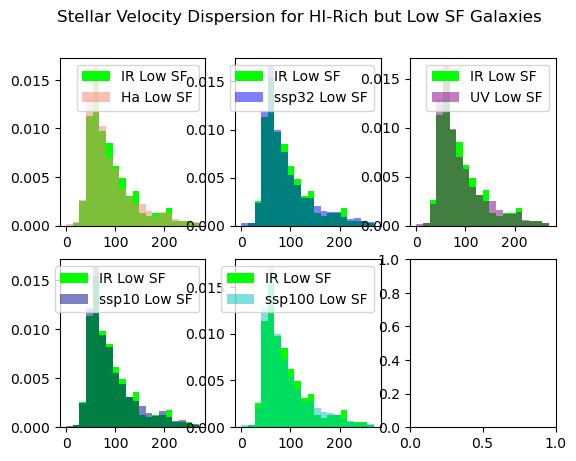

In [39]:
StellarVDis=DAP['STELLAR_SIGMA_1RE']
a=0.5
xx=0
yy=270
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Stellar Velocity Dispersion for HI-Rich but Low SF Galaxies')


axs[0,0].hist(StellarVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,0].hist(StellarVDis[HaLowSF], bins=20, alpha=a, range=(xx,yy), color='salmon', label=('Ha Low SF'), density=True)
axs[0,0].legend()

axs[1,0].hist(StellarVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,0].hist(StellarVDis[ssp10LowSF], bins=20, alpha=a, range=(xx,yy), color = 'darkblue', label=('ssp10 Low SF'), density=True)
axs[1,0].legend()


axs[0,1].hist(StellarVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,1].hist(StellarVDis[ssp32LowSF], bins=20, alpha=a, range=(xx,yy), color='blue', label=('ssp32 Low SF'), density=True)
axs[0,1].legend()

axs[1,1].hist(StellarVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,1].hist(StellarVDis[ssp100LowSF], bins=20, alpha=a, range=(xx,yy), color= 'c', label=('ssp100 Low SF'), density=True)
axs[1,1].legend()

axs[0,2].hist(StellarVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,2].hist(StellarVDis[UVLowSF], bins=20, alpha=a, color= 'purple', range=(xx,yy), label=('UV Low SF'), density=True)
axs[0,2].legend()

'''
K-S tests
'''
xIR=StellarVDis[IRLowSF]
print ('K-S test for Stellar Velocity Dispersion')
print ('For Ha: ',stats.kstest(xIR, StellarVDis[HaLowSF]))
print('For ssp10: ', stats.kstest(xIR, StellarVDis[ssp10LowSF]))
print('For ssp32: ', stats.kstest(xIR, StellarVDis[ssp32LowSF]))
print('For ssp100: ', stats.kstest(xIR, StellarVDis[ssp100LowSF]))
print ('For UV: ', stats.kstest(xIR, StellarVDis[UVLowSF]))

K-S test for Stellar Velocity Asymmetry
For Ha:  KstestResult(statistic=0.03247489471979268, pvalue=0.9640669281697669)
For ssp10:  KstestResult(statistic=0.046031746031746035, pvalue=0.7749699375214035)
For ssp32:  KstestResult(statistic=0.03694231315714692, pvalue=0.9234928249372689)
For ssp100:  KstestResult(statistic=0.030095839177185602, pvalue=0.9764199148659756)
For UV:  KstestResult(statistic=0.03238414293690676, pvalue=0.9603141128288734)


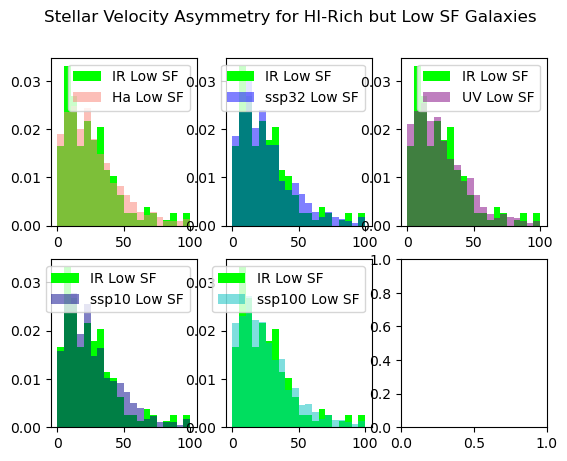

In [40]:
StellarVAsym=np.abs(DAP['STELLAR_VEL_HI_CLIP'])-np.abs(DAP['STELLAR_VEL_LO_CLIP'])
a=0.5
xx=0
yy=100
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Stellar Velocity Asymmetry for HI-Rich but Low SF Galaxies')


axs[0,0].hist(StellarVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,0].hist(StellarVAsym[HaLowSF], bins=20, alpha=a, range=(xx,yy), color='salmon', label=('Ha Low SF'), density=True)
axs[0,0].legend()

axs[1,0].hist(StellarVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,0].hist(StellarVAsym[ssp10LowSF], bins=20, alpha=a, range=(xx,yy), color = 'darkblue', label=('ssp10 Low SF'), density=True)
axs[1,0].legend()


axs[0,1].hist(StellarVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,1].hist(StellarVAsym[ssp32LowSF], bins=20, alpha=a, range=(xx,yy), color='blue', label=('ssp32 Low SF'), density=True)
axs[0,1].legend()

axs[1,1].hist(StellarVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[1,1].hist(StellarVAsym[ssp100LowSF], bins=20, alpha=a, range=(xx,yy), color= 'c', label=('ssp100 Low SF'), density=True)
axs[1,1].legend()

axs[0,2].hist(StellarVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
axs[0,2].hist(StellarVAsym[UVLowSF], bins=20, alpha=a, color= 'purple', range=(xx,yy), label=('UV Low SF'), density=True)
axs[0,2].legend()

'''
K-S tests
'''
xIR=StellarVAsym[IRLowSF]
print ('K-S test for Stellar Velocity Asymmetry')
print ('For Ha: ',stats.kstest(xIR, StellarVAsym[HaLowSF]))
print('For ssp10: ', stats.kstest(xIR, StellarVAsym[ssp10LowSF]))
print('For ssp32: ', stats.kstest(xIR, StellarVAsym[ssp32LowSF]))
print('For ssp100: ', stats.kstest(xIR, StellarVAsym[ssp100LowSF]))
print ('For UV: ', stats.kstest(xIR, StellarVAsym[UVLowSF]))